In [1]:
%matplotlib inline


# Density Estimation for a Gaussian mixture


Plot the density estimation of a mixture of two Gaussians. Data is
generated from two Gaussians with different centers and covariance
matrices.


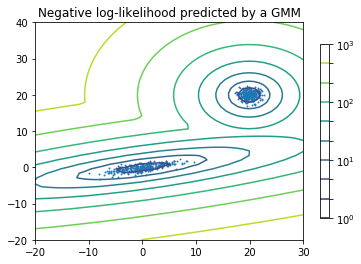

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from sklearn import mixture

n_samples = 300

# generate random sample, two components
np.random.seed(0)

# generate spherical data centered on (20, 20)
shifted_gaussian = np.random.randn(n_samples, 2) + np.array([20, 20])

# generate zero centered stretched Gaussian data
C = np.array([[0., -0.7], [3.5, .7]])
stretched_gaussian = np.dot(np.random.randn(n_samples, 2), C)

# concatenate the two datasets into the final training set
X_train = np.vstack([shifted_gaussian, stretched_gaussian])

# fit a Gaussian Mixture Model with two components
clf = mixture.GaussianMixture(n_components=2, covariance_type='full')
clf.fit(X_train)

# display predicted scores by the model as a contour plot
x = np.linspace(-20., 30.)
y = np.linspace(-20., 40.)
X, Y = np.meshgrid(x, y)
XX = np.array([X.ravel(), Y.ravel()]).T
Z = -clf.score_samples(XX)
Z = Z.reshape(X.shape)

CS = plt.contour(X, Y, Z, norm=LogNorm(vmin=1.0, vmax=1000.0),
                 levels=np.logspace(0, 3, 10))
CB = plt.colorbar(CS, shrink=0.8, extend='both')
plt.scatter(X_train[:, 0], X_train[:, 1], .8)

plt.title('Negative log-likelihood predicted by a GMM')
plt.axis('tight')
plt.show()

In [5]:
print(X_train)


[[ 21.76405235  20.40015721]
 [ 20.97873798  22.2408932 ]
 [ 21.86755799  19.02272212]
 ..., 
 [  3.63154983  -0.24845295]
 [ -2.07822107  -0.42879847]
 [  2.06396262   1.82110875]]


In [6]:
print(shifted_gaussian)
print(stretched_gaussian)

[[ 21.76405235  20.40015721]
 [ 20.97873798  22.2408932 ]
 [ 21.86755799  19.02272212]
 [ 20.95008842  19.84864279]
 [ 19.89678115  20.4105985 ]
 [ 20.14404357  21.45427351]
 [ 20.76103773  20.12167502]
 [ 20.44386323  20.33367433]
 [ 21.49407907  19.79484174]
 [ 20.3130677   19.14590426]
 [ 17.44701018  20.6536186 ]
 [ 20.8644362   19.25783498]
 [ 22.26975462  18.54563433]
 [ 20.04575852  19.81281615]
 [ 21.53277921  21.46935877]
 [ 20.15494743  20.37816252]
 [ 19.11221425  18.01920353]
 [ 19.65208785  20.15634897]
 [ 21.23029068  21.20237985]
 [ 19.61267318  19.69769725]
 [ 18.95144703  18.57998206]
 [ 18.29372981  21.9507754 ]
 [ 19.49034782  19.5619257 ]
 [ 18.74720464  20.77749036]
 [ 18.38610215  19.78725972]
 [ 19.10453344  20.3869025 ]
 [ 19.48919486  18.81936782]
 [ 19.97181777  20.42833187]
 [ 20.06651722  20.3024719 ]
 [ 19.36567791  19.63725883]
 [ 19.32753955  19.64044684]
 [ 19.18685372  18.2737174 ]
 [ 20.17742614  19.59821906]
 [ 18.36980165  20.46278226]
 [ 19.09270164